In [2]:
import pandas as pd
import numpy as np


In [64]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [65]:
df['sex']=df['sex'].replace(['Male','Female'],['1','0'])
df['discipline']=df['discipline'].replace(['A','B'],['1','0'])
df['rank']=df['rank'].replace(['Prof','AsstProf','AssocProf'],['1','0','0'])

In [66]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,0,19,18,1,139750
1,1,0,20,16,1,173200
2,0,0,4,3,1,79750
3,1,0,45,39,1,115000
4,1,0,40,41,1,141500
...,...,...,...,...,...,...
392,1,1,33,30,1,103106
393,1,1,31,19,1,150564
394,1,1,42,25,1,101738
395,1,1,25,15,1,95329


In [67]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [68]:
df.shape[0]

397

In [69]:
df.isnull().sum().sum()

0

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [71]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [73]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


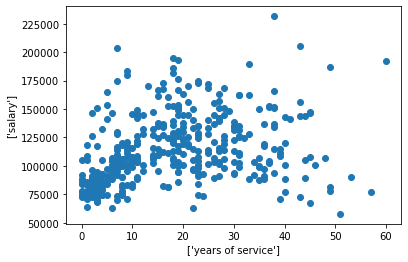

In [74]:
plt.scatter(df['yrs.service'],df['salary'])
plt.xlabel(['years of service'])
plt.ylabel(['salary'])
plt.show()

In [75]:
x=df.drop('salary',axis=1)
y=df['salary']

In [76]:
x.shape,y.shape

((397, 5), (397,))

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((317, 5), (80, 5), (317,), (80,))

In [78]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [79]:
pred = lr.predict(x_test)
pred

array([ 94280.84247844, 119104.79889192,  95371.3852317 , 119241.84846728,
       120305.58523684, 128797.54691619,  81550.25945969,  85123.20634317,
       136486.56489472, 118193.024518  , 120210.25446547,  91628.95696467,
       129430.78956392, 128712.69638964, 124623.43127829, 118675.71768866,
       123440.16392126,  90800.62019873, 123052.80152199, 121599.09618554,
       139829.73759907, 122251.27073974, 134996.76657878,  85054.68155549,
       132511.75628095, 117528.54331112,  87545.31767781, 115609.66379192,
       132386.59986899,  96131.19720996, 122748.87673068, 130300.84513385,
       123550.40751293, 139290.41280414, 136528.2836987 ,  78221.99957563,
       130233.73326474, 118633.99888467,  80832.16628542, 132869.29303964,
       138655.75723783, 129210.30238059, 125013.39984517, 117570.2621151 ,
       126892.16729871, 119256.76128757,  91214.7885817 ,  90800.62019873,
        79092.05514556, 129844.95794689,  93065.14331322, 131888.99387805,
        79285.7363452 , 1

In [80]:
y_test

10     119800
261    107550
354     83600
277    163200
17     103450
        ...  
372    109707
375    103649
371    110515
28      77000
295     97150
Name: salary, Length: 80, dtype: int64

In [81]:
diff=y_test=pred

In [82]:
pd.DataFrame(np.c_[pred],columns=['predicted'])

,predicted
0,94280.842478
1,119104.798892
2,95371.385232
3,119241.848467
4,120305.585237
...,...
75,116920.693729
76,117653.699723
77,117460.018523
78,98091.795533
